In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing data

In [25]:
for file in os.listdir():
    if file.endswith(".xls"):
        print(file)
        df = pd.read_excel(file)

Jumbo & Company_ Attach % .xls


## Inspect the data

In [3]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [4]:
df.tail()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
158,Gujarat,Vadodara(Manjalpur) Br,0.25,0.12,0.15,0.0,0.01
159,Thane,Kharghar Br,0.00,0.00,0.00,0.0,0.00
160,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.00,0.00,0.00,0.0,0.00
161,Telangana,Ap(Rajamundry),0.00,0.00,0.00,0.0,0.00
162,Gujarat,Vadodara(Kothi Road),0.00,0.00,0.00,0.0,0.00


## Basic Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


## Data Cleaning 
### Checking for duplicates, null or missing values

In [6]:
df.isnull().sum()

Branch        0
Store_Name    0
Dec           0
Nov           0
Oct           0
Sep           0
Aug           0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Ensuring Monthly columns are numeric

In [8]:
months = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug']
for col in months:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

## Calculating Average Attach Rate

In [9]:
df['Avg_Attach_Rate'] = df[months].mean(axis=1)
df['Avg_Attach_Rate']

0      0.210
1      0.188
2      0.350
3      0.294
4      0.164
       ...  
158    0.106
159    0.000
160    0.000
161    0.000
162    0.000
Name: Avg_Attach_Rate, Length: 163, dtype: float64

## Store Categorization function

In [10]:
def categorize_store(avg_rate):
    if avg_rate >= 0.40:
        return 'Excellent'
    elif avg_rate >= 0.20:
        return 'Good'
    else:
        return 'Needs Improvement'

In [11]:
df['Store_Category'] = df['Avg_Attach_Rate'].apply(categorize_store)

In [12]:
df['Store_Category']

0                   Good
1      Needs Improvement
2                   Good
3                   Good
4      Needs Improvement
             ...        
158    Needs Improvement
159    Needs Improvement
160    Needs Improvement
161    Needs Improvement
162    Needs Improvement
Name: Store_Category, Length: 163, dtype: object

## Forecasting January Attach % (Weighted Moving Average)
##  Weights: Dec (0.5), Nov (0.3), Oct (0.2)

<h3>Why use weights?
- December is the most recent month, so it gets the highest weight (0.5).
- November is slightly older, so it gets a medium weight (0.3).
- October is even older, so it gets the lowest weight (0.2).
This way, the forecast reflects recent trends more strongly than older ones</h3>


In [13]:
df['Jan_Forecast'] = (df['Dec'] * 0.5) + (df['Nov'] * 0.3) + (df['Oct'] * 0.2)
df['Jan_Forecast'] = df['Jan_Forecast'].round(2)

## Save the processed data

In [14]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,Avg_Attach_Rate,Store_Category,Jan_Forecast
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24,0.210,Good,0.20
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04,0.188,Needs Improvement,0.21
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43,0.350,Good,0.29
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32,0.294,Good,0.34
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17,0.164,Needs Improvement,0.16


In [16]:
cols = ['Aug','Sep','Oct','Nov','Dec','Avg_Attach_Rate','Jan_Forecast']
with pd.ExcelWriter("Jan_Forecast_data.xlsx", engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Sheet 1", index=False)

    workbook  = writer.book
    worksheet = writer.sheets["Sheet 1"]

    # Define percentage format
    percent_fmt = workbook.add_format({'num_format': '0%'})

    # Apply format to specific columns
    for col_num, col_name in enumerate(df.columns):
        if col_name in cols:
            worksheet.set_column(col_num, col_num, None, percent_fmt)

## Visualizations

In [18]:
sns.set(style="whitegrid")
branch_group = df.groupby('Branch')['Avg_Attach_Rate'].mean().sort_values(ascending=False).reset_index()

##  Plot 1: Average Attach Rate by Branch

C:\Users\Nikhil Yadav\AppData\Local\Temp\ipykernel_14412\2678294420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=branch_group, x='Avg_Attach_Rate', y='Branch', palette='viridis')


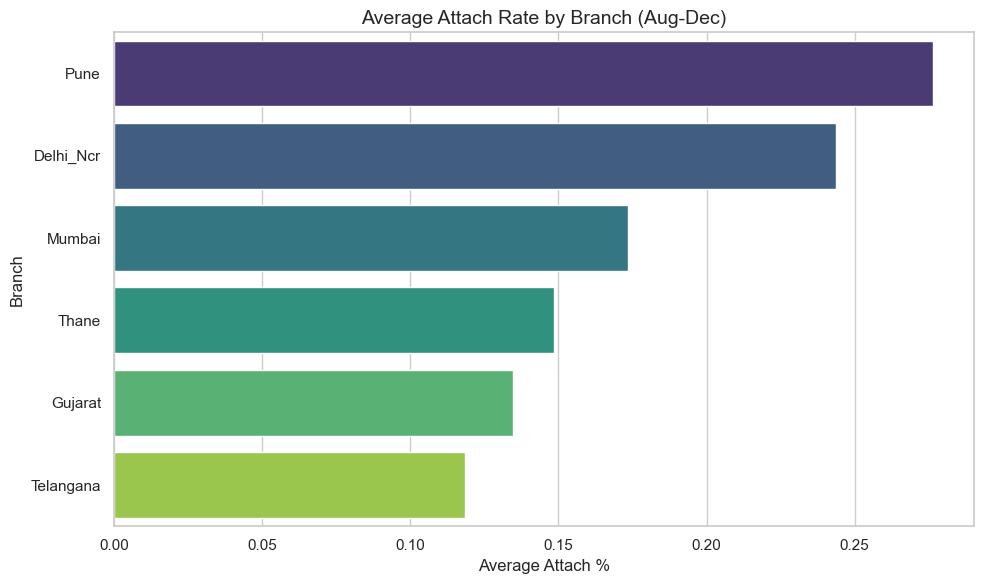

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=branch_group, x='Avg_Attach_Rate', y='Branch', palette='viridis')
plt.title('Average Attach Rate by Branch (Aug-Dec)', fontsize=14)
plt.xlabel('Average Attach %')
plt.ylabel('Branch')
plt.tight_layout()
plt.savefig('Branch_Performance.png')
plt.show()

## Plot 2: Store Category Distribution

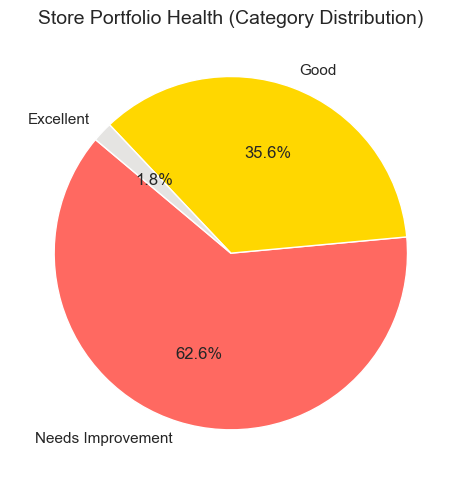

In [21]:
plt.figure(figsize=(8, 5))
category_counts = df['Store_Category'].value_counts()
colors = {'Excellent': '#e5e4e2', 'Good': '#ffd700', 'Needs Improvement': '#ff6961'}
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=[colors.get(x, '#333333') for x in category_counts.index], startangle=140)
plt.title('Store Portfolio Health (Category Distribution)', fontsize=14)
plt.tight_layout()
plt.savefig('Store_Categories.png')
plt.show()

## Plot 3: Trend Analysis (Top 3 vs Bottom 3 Branches)

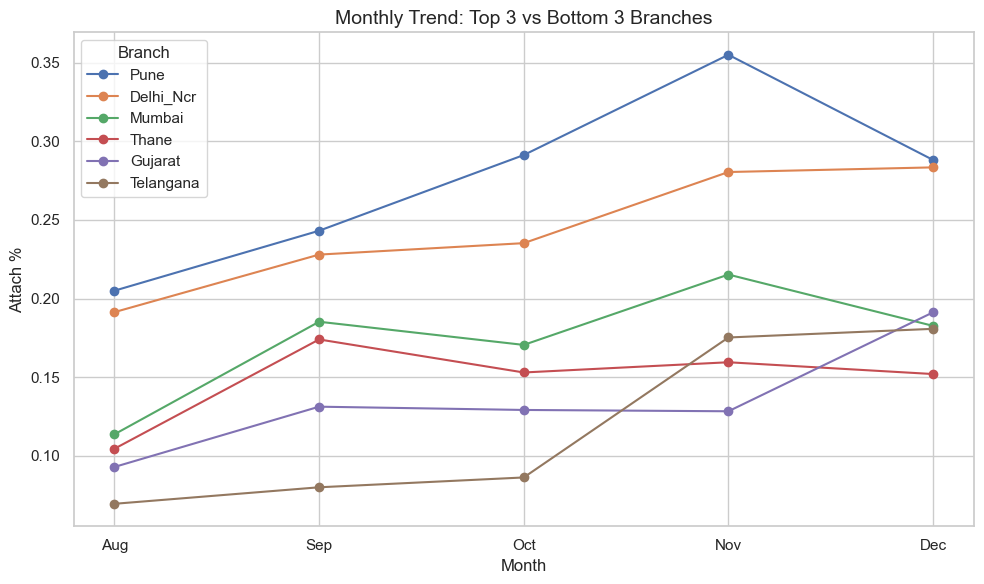

In [22]:
top_branches = branch_group['Branch'].head(3).tolist()
bottom_branches = branch_group['Branch'].tail(3).tolist()
selected_branches = top_branches + bottom_branches

trend_data = df[df['Branch'].isin(selected_branches)].groupby('Branch')[months].mean().T
trend_data.index = pd.CategoricalIndex(trend_data.index, categories=['Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
trend_data = trend_data.sort_index()

plt.figure(figsize=(10, 6))
for branch in selected_branches:
    plt.plot(trend_data.index, trend_data[branch], marker='o', label=branch)

plt.title('Monthly Trend: Top 3 vs Bottom 3 Branches', fontsize=14)
plt.ylabel('Attach %')
plt.xlabel('Month')
plt.legend(title='Branch')
plt.grid(True)
plt.tight_layout()
plt.savefig('Trend_Analysis.png')
plt.show()